# 보험상품분류에 따른 연관분석(장바구니분석)

In [68]:
import pandas as pd

### 1. 데이터 가져오기

In [69]:
# 텍스트 파일도 'read_csv' 사용
data1=pd.read_csv("C:\\Users\\dgbfg\\Documents\\Pilot Project\\R-유지율분석\\유지율 예측용 기초자료_1.txt",\
                sep='\t',header=0)
data2=pd.read_csv("C:\\Users\\dgbfg\\Documents\\Pilot Project\\R-유지율분석\\유지율 예측용 기초자료_2.txt",\
                sep='\t',header=0, encoding='euc-kr')
data3=pd.read_csv("C:\\Users\\dgbfg\\Documents\\Pilot Project\\R-유지율분석\\유지율 예측용 기초자료_3.txt",\
                sep='\t',header=0, encoding='euc-kr')
data4=pd.read_csv("C:\\Users\\dgbfg\\Documents\\Pilot Project\\R-유지율분석\\유지율 예측용 기초자료_4.txt",\
                sep='\t',header=0, encoding='euc-kr')

In [70]:
# 데이터 확인
data1.shape, data2.shape, data3.shape, data4.shape

((1082014, 19), (445687, 19), (429053, 19), (58863, 19))

In [71]:
# 총계 확인
sum([data1.shape[0], data2.shape[0],data3.shape[0], data4.shape[0]])

2015617

### 2. 데이터 전처리, 변수선택

In [72]:
# EDA
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082014 entries, 0 to 1082013
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   증권번호        1082014 non-null  int64  
 1   모집채널        1082014 non-null  object 
 2   상품코드        1082014 non-null  object 
 3   상품명         1082014 non-null  object 
 4   합계보험료       625429 non-null   float64
 5   최종합계보험료     1082014 non-null  int64  
 6   납입주기        1082014 non-null  object 
 7   년기준         1082014 non-null  int64  
 8   납기          1082014 non-null  int64  
 9   생명보험협회상품종류  1082014 non-null  object 
 10  계약일자        1082014 non-null  int64  
 11  계약자주민번호     1082014 non-null  object 
 12  직업          1081437 non-null  object 
 13  약관대출잔액      240982 non-null   float64
 14  최종납입회차      1082014 non-null  int64  
 15  최종입금일자      1081891 non-null  float64
 16  계약상태코드      1082014 non-null  int64  
 17  소멸일자        572159 non-null   float64
 18  해촉일         1076794 no

In [73]:
# 변수선택
df1 = data1.loc[:,['계약자주민번호','생명보험협회상품종류','증권번호']]
df2 = data2.loc[:,['계약자주민번호','생명보험협회상품종류','증권번호']]
df3 = data3.loc[:,['계약자주민번호','생명보험협회상품종류','증권번호']]
df4 = data4.loc[:,['계약자주민번호','생명보험협회상품종류','증권번호']]

In [74]:
# 결측치 확인
df1.isnull().sum(),\
df2.isnull().sum(),\
df3.isnull().sum(),\
df4.isnull().sum()

(계약자주민번호       0
 생명보험협회상품종류    0
 증권번호          0
 dtype: int64,
 계약자주민번호       0
 생명보험협회상품종류    0
 증권번호          0
 dtype: int64,
 계약자주민번호       0
 생명보험협회상품종류    0
 증권번호          0
 dtype: int64,
 계약자주민번호       0
 생명보험협회상품종류    0
 증권번호          0
 dtype: int64)

In [75]:
# 총계 확인
sum([df1.shape[0], df2.shape[0],df3.shape[0], df4.shape[0]])

2015617

In [76]:
# 데이터 합치기
df_all = pd.concat([df1,df2,df3,df4],axis=0,join='outer',ignore_index=True)
df_all.shape

(2015617, 3)

In [77]:
# 데이터 확인
df_all['생명보험협회상품종류'].value_counts()

저축보험     439912
연금보험     341187
종신보험     303716
암보험      224496
정기보험     184002
건강보험     175783
기타보험     150646
어린이보험     93352
상해보험      60941
교육보험      20947
CI보험       8797
실손보험       7713
LTC보험      4084
단체보험         41
Name: 생명보험협회상품종류, dtype: int64

In [78]:
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [79]:
from matplotlib import font_manager as fm
sys_font= fm.findSystemFonts()
[f for f in sys_font]

['C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\seguibl.ttf',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\framd.ttf',
 'C:\\Windows\\Fonts\\mingliub.ttc',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\msyi.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\Candaraz.ttf',
 'C:\\Windows\\Fonts\\corbel.ttf',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\SitkaZ.ttc',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\gadugi.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',

C:\Users\dgbfg\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(-0.5, 499.5, 399.5, -0.5)

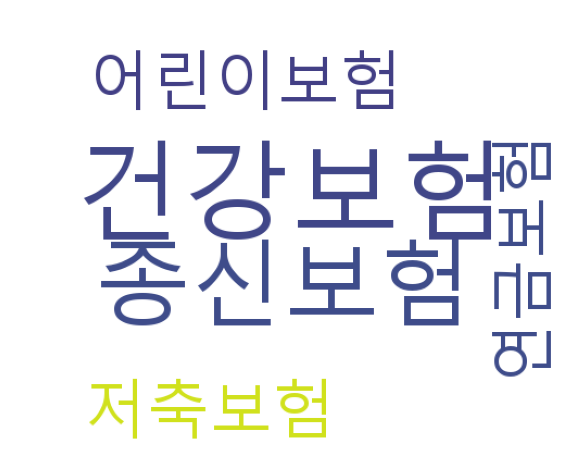

In [80]:
# 워드클라우드
plt.rcParams['figure.figsize']=(7,7)
# plt.rc('figure',figsize=(15,15))
plt.rcParams['axes.unicode_minus']=False
# plt.rc('axes',unicode_minus=False)
FONT_PATH='C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path=FONT_PATH,background_color='white',width=500,height=400,
                      max_words=5,max_font_size=100,relative_scaling=0.5)
wordcloud.generate(str(df_all['생명보험협회상품종류']))
plt.imshow(wordcloud)
plt.axis('off')

In [81]:
# 그룹화 적용시도
df_all.groupby(by=['계약자주민번호'],as_index=True).생명보험협회상품종류.value_counts()

계약자주민번호        생명보험협회상품종류
******         저축보험          2041
               정기보험           345
               연금보험           332
               암보험            307
               종신보험           280
                             ... 
9912311******  종신보험             5
               연금보험             1
9912312******  종신보험             3
               실손보험             2
               연금보험             1
Name: 생명보험협회상품종류, Length: 336956, dtype: int64

In [82]:
# 이상치 제거
combined=[]
for i in zip(df_all['계약자주민번호'] == '******',
             df_all['계약자주민번호'] == '0000000******'):
    combined.append(any(i))

# df_all[combined]['계약자주민번호'].value_counts()
df_all.drop(df_all[combined].index, axis=0, inplace=True)

In [83]:
# 연관분석 함수에 적용되는 구조로 변환(pivot_table) 및 논리값(bool)으로 변환
pd.pivot_table(df_all,values=['증권번호'],index=['계약자주민번호'],columns=['생명보험협회상품종류'],\
               aggfunc=lambda x:x.count()>0,fill_value=False)
df_all_pivoted=pd.pivot_table(df_all,values=['증권번호'],index=['계약자주민번호'],columns=['생명보험협회상품종류'],\
                              aggfunc=lambda x:x.count()>0,fill_value=False)

In [84]:
# 연관분석 함수에 적용되는 구조로 재변환(xs)
df_all_pivoted = df_all_pivoted.xs('증권번호',axis=1)
# df_all_pivoted.columns

In [85]:
!pip install mlxtend

## 연관규칙분석

* __지지도(support)__  
>동시에 포함된 거래의 비율, _p(A∩B)_


* __신뢰도(confidence)__  
>어떤 하나의 품목이 구매되었을 때 다른 품목 하나가 구매될 확률, _p(B|A) = p(A∩B)/p(A)_


* __향상도(lift)__  
>품목A가 주어지지 않았을 때 품목B가 구매될 확률 대비 품목A가 구매될 때 품목B가 구매될 확률, _p(B|A)/p(B)_

### 3.모델링

In [86]:
# 연관분석 첫번째함수(apriori) 적용
from mlxtend.frequent_patterns import apriori, association_rules

freq_items_apriori = apriori(df_all_pivoted, min_support=0.3, use_colnames=True)
freq_items_apriori.sort_values('support',ascending=False)

,support,itemsets
5,0.734214,(연금보험)
6,0.711479,(저축보험)
8,0.606198,(종신보험)
34,0.559597,"(연금보험, 저축보험)"
36,0.534752,"(연금보험, 종신보험)"
...,...,...
105,0.302510,"(정기보험, 건강보험, 상해보험, 저축보험)"
162,0.302327,"(상해보험, 저축보험, 암보험, 연금보험, 종신보험)"
104,0.301486,"(연금보험, 건강보험, 상해보험, 정기보험)"
26,0.300187,"(암보험, 어린이보험)"


In [87]:
# 구성item 개수 열 추가
freq_items_apriori['length'] = freq_items_apriori['itemsets'].apply( lambda x:len(x) ) # map,transform 사용가능
freq_items_apriori = freq_items_apriori[ freq_items_apriori['length']<=3]
freq_items_apriori.sort_values('support',ascending=False)

,support,itemsets,length
5,0.734214,(연금보험),1
6,0.711479,(저축보험),1
8,0.606198,(종신보험),1
34,0.559597,"(연금보험, 저축보험)",2
36,0.534752,"(연금보험, 종신보험)",2
...,...,...,...
32,0.309115,"(어린이보험, 저축보험)",2
48,0.305660,"(정기보험, 건강보험, 상해보험)",3
86,0.303917,"(연금보험, 어린이보험, 종신보험)",3
85,0.303672,"(연금보험, 어린이보험, 저축보험)",3


In [88]:
# 연관분석 두번째함수(association_rules) 적용
freq_items_apr_ar=association_rules(freq_items_apriori,metric='confidence', min_threshold=0.5)
freq_items_apr_ar.sort_values('lift',ascending=False).iloc[:,[0,1,4,5,6]]

,antecedents,consequents,support,confidence,lift
226,(정기보험),"(종신보험, 기타보험)",0.336865,0.676710,1.905908
225,"(종신보험, 기타보험)",(정기보험),0.336865,0.948758,1.905908
86,(건강보험),"(기타보험, 종신보험)",0.332156,0.675256,1.901812
85,"(기타보험, 종신보험)",(건강보험),0.332156,0.935495,1.901812
108,(정기보험),"(건강보험, 상해보험)",0.305660,0.614024,1.901645
...,...,...,...,...,...
332,"(연금보험, 종신보험)",(저축보험),0.455478,0.851755,1.197162
56,(저축보험),(종신보험),0.472770,0.664489,1.096158
55,(종신보험),(저축보험),0.472770,0.779894,1.096158
47,(연금보험),(저축보험),0.559597,0.762172,1.071249
